# Does trade impact core inflation dynamics?
**Author: Suraj Kumar** *(Along with Dr. Udupa, Dr. Bharat and Prof. Sengupta)*

*Centre for Advanced Financial Research and Learning, Reserve Bank of India, Mumbai*

**Abstract**
* In this notebook, We analyze the impact of interstate trade on the pass-through of food/fuel inflation to core inflation, within the Indian states setting. Specifically, we regress core inflation, in a *panel local projections* framework, on the food/fuel inflation for more/less trading states. 


**Data**
* Inflation: NSO data on category of inflation(food/fuel/core) for all indian states at monthly level from 2011-m1 onwards. 
* Trade: As per FY20 Eway-Bill data

**Findings**
* States which trade more (exports/imports/total) have lower pass-through of food/fuel inflation to core inflation

**Code Credits**

[Oscar Jorda STATA Code](https://sites.google.com/site/oscarjorda/home/local-projections)

#### 1. Preliminary settings and loading data

In [4]:
// Notebook options
set more off

// Setting global folder
global fd "/Users/suraj/Dropbox/NKPC Estimation State Panel data/"

// Loading the merged data
use "$fd/data/dta_files/cpi_states_inflation_data_20230425_ewaybill_total_trade.dta", clear

#### 2. Modelling the pass-through across of food and fuel to core inflation based on total trade

In [5]:
// Specying options for regression
local ar = 12
local ma = 12
local hmax = 24

#### 2.1 Impulse response for all states 

In [6]:
tab total_ind


       1 if |
    states' |
total trade |
   share is |
  more than |
     India  |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      3,276       65.62       65.62
          1 |      1,716       34.38      100.00
------------+-----------------------------------
      Total |      4,992      100.00


In [7]:
* Running Core inflation on lags of Food and Fuel Inflation
eststo clear
qui cap drop b_core_food u_core_food d_core_food b_core_fuel u_core_fuel d_core_fuel horizons Zero

* Initializing variables to store the regression output
qui gen horizons = _n-1 if _n <= `hmax'
qui gen Zero = 0 if _n <= `hmax'
qui gen b_core_food = .
qui gen u_core_food = .
qui gen d_core_food = .
qui gen b_core_fuel = .
qui gen u_core_fuel = .
qui gen d_core_fuel = .

forv h = 0/`hmax'{
    
    ** Regression 1
    * on inflation
    qui reghdfe picore_`h' l(0/`ma').pifood l(0/`ma').pifuel l(1/`ar').picore if total_ind != ., absorb(state2 mdate) cluster(state2)
    
    // Saving the Food Coefficient results
    qui replace b_core_food = _b[pifood]  if _n == `h'+1
    qui replace u_core_food = _b[pifood] + 1.96*_se[pifood] if _n == `h'+1
    qui replace d_core_food = _b[pifood] - 1.96*_se[pifood] if _n == `h'+1
    
    // Saving the Fuel Coefficient Reults
    qui replace b_core_fuel = _b[pifuel]  if _n == `h'+1
    qui replace u_core_fuel = _b[pifuel] + 1.96*_se[pifuel] if _n == `h'+1
    qui replace d_core_fuel = _b[pifuel] - 1.96*_se[pifuel] if _n == `h'+1
    qui eststo
}

// Saving the regression output
// qui esttab using "$fd/Results/regression/lp_core_on_food_fuel_eway_total_all.html", html replace

#### 2.2 Impulse response for states which trade more

states for which total_ind == 1

In [8]:
* Running Core inflation on lags of Food and Fuel Inflation
eststo clear
qui cap drop b_core_food_tottrade_m u_core_food_tottrade_m d_core_food_tottrade_m b_core_fuel_tottrade_m u_core_fuel_tottrade_m d_core_fuel_tottrade_m 

* Initializing variables to store the regression output
// qui gen horizons = _n-1 if _n <= `hmax'
// qui gen Zero = 0 if _n <= `hmax'
qui gen b_core_food_tottrade_m = .
qui gen u_core_food_tottrade_m = .
qui gen d_core_food_tottrade_m = .
qui gen b_core_fuel_tottrade_m = .
qui gen u_core_fuel_tottrade_m = .
qui gen d_core_fuel_tottrade_m = .

forv h = 0/`hmax'{
    
    ** Regression 1
    * on inflation
    qui reghdfe picore_`h' l(0/`ma').pifood l(0/`ma').pifuel l(1/`ar').picore if total_ind == 1, absorb(state2 mdate) cluster(state2)
    
    // Saving the Food Coefficient results
    qui replace b_core_food_tottrade_m = _b[pifood]  if _n == `h'+1
    qui replace u_core_food_tottrade_m = _b[pifood] + 1.96*_se[pifood] if _n == `h'+1
    qui replace d_core_food_tottrade_m = _b[pifood] - 1.96*_se[pifood] if _n == `h'+1
    
    // Saving the Fuel Coefficient Reults
    qui replace b_core_fuel_tottrade_m = _b[pifuel]  if _n == `h'+1
    qui replace u_core_fuel_tottrade_m = _b[pifuel] + 1.96*_se[pifuel] if _n == `h'+1
    qui replace d_core_fuel_tottrade_m = _b[pifuel] - 1.96*_se[pifuel] if _n == `h'+1
    qui eststo
}

// Saving the regression output
// qui esttab using "$fd/Results/regression/lp_core_on_food_fuel_eway_total_more.html", html replace

#### 2.3 Impulse response for states which trade less

states for which total_ind == 0

In [9]:
* Running Core inflation on lags of Food and Fuel Inflation
eststo clear
qui cap drop b_core_food_tottrade_l u_core_food_tottrade_l d_core_food_tottrade_l b_core_fuel_tottrade_l u_core_fuel_tottrade_l d_core_fuel_tottrade_l 

* Initializing variables to store the regression output
// qui gen horizons = _n-1 if _n <= `hmax'
// qui gen Zero = 0 if _n <= `hmax'
qui gen b_core_food_tottrade_l = .
qui gen u_core_food_tottrade_l = .
qui gen d_core_food_tottrade_l = .
qui gen b_core_fuel_tottrade_l = .
qui gen u_core_fuel_tottrade_l = .
qui gen d_core_fuel_tottrade_l = .

forv h = 0/`hmax'{
    
    ** Regression 1
    * on inflation
    qui reghdfe picore_`h' l(0/`ma').pifood l(0/`ma').pifuel l(1/`ar').picore if total_ind == 0, absorb(state2 mdate) cluster(state2)
    
    // Saving the Food Coefficient results
    qui replace b_core_food_tottrade_l = _b[pifood]  if _n == `h'+1
    qui replace u_core_food_tottrade_l = _b[pifood] + 1.96*_se[pifood] if _n == `h'+1
    qui replace d_core_food_tottrade_l = _b[pifood] - 1.96*_se[pifood] if _n == `h'+1
    
    // Saving the Fuel Coefficient Reults
    qui replace b_core_fuel_tottrade_l = _b[pifuel]  if _n == `h'+1
    qui replace u_core_fuel_tottrade_l = _b[pifuel] + 1.96*_se[pifuel] if _n == `h'+1
    qui replace d_core_fuel_tottrade_l = _b[pifuel] - 1.96*_se[pifuel] if _n == `h'+1
    qui eststo
}

// Saving the regression output
// qui esttab using "$fd/Results/regression/lp_core_on_food_fuel_eway_total_less.html", html replace

#### 2.4. Plotting all charts

In [11]:
// Plotting the charts Core on Food inf. Shocks

// 1. All States
qui twoway ///
(rarea u_core_food d_core_food horizons,  ///
fcolor(gs13) lcolor(gs13) lw(none) lpattern(solid)) ///
(line b_core_food horizons, lcolor(blue) ///
lpattern(solid) lwidth(thick)) ///
(line Zero horizons, lcolor(black)), legend(off) ///
title("1pp shock to food inf. (All)", color(black) size(medsmall)) ///
ytitle("Percent", size(medsmall)) xtitle("Months", size(medsmall)) ///
graphregion(color(white)) plotregion(color(white)) 
qui gr rename fig_core_food, replace



// 2. More Trading states
qui twoway ///
(rarea u_core_food_tottrade_m d_core_food_tottrade_m horizons,  ///
fcolor(gs13) lcolor(gs13) lw(none) lpattern(solid)) ///
(line b_core_food_tottrade_m horizons, lcolor(blue) ///
lpattern(solid) lwidth(thick)) ///
(line Zero horizons, lcolor(black)), legend(off) ///
title("1pp shock to food inf. (More Trading states)", color(black) size(medsmall)) ///
ytitle("Percent", size(medsmall)) xtitle("Months", size(medsmall)) ///
graphregion(color(white)) plotregion(color(white)) 
qui gr rename fig_core_food_tottrade_m, replace



// 3. Less Trading states
qui twoway ///
(rarea u_core_food_tottrade_l d_core_food_tottrade_l horizons,  ///
fcolor(gs13) lcolor(gs13) lw(none) lpattern(solid)) ///
(line b_core_food_tottrade_l horizons, lcolor(blue) ///
lpattern(solid) lwidth(thick)) ///
(line Zero horizons, lcolor(black)), legend(off) ///
title("1pp shock to food inf. (Less Trading states)", color(black) size(medsmall)) ///
ytitle("Percent", size(medsmall)) xtitle("Months", size(medsmall)) ///
graphregion(color(white)) plotregion(color(white)) 
qui gr rename fig_core_food_tottrade_l, replace


// All graphs related to fuel shocks

// 1. All States
qui twoway ///
(rarea u_core_fuel d_core_fuel horizons,  ///
fcolor(gs13) lcolor(gs13) lw(none) lpattern(solid)) ///
(line b_core_fuel horizons, lcolor(blue) ///
lpattern(solid) lwidth(thick)) ///
(line Zero horizons, lcolor(black)), legend(off) ///
title("1pp shock to fuel inf. (All)", color(black) size(medsmall)) ///
ytitle("Percent", size(medsmall)) xtitle("Months", size(medsmall)) ///
graphregion(color(white)) plotregion(color(white)) 
qui gr rename fig_core_fuel, replace


// 2. More Trading states
qui twoway ///
(rarea u_core_fuel_tottrade_m d_core_fuel_tottrade_m horizons,  ///
fcolor(gs13) lcolor(gs13) lw(none) lpattern(solid)) ///
(line b_core_fuel_tottrade_m horizons, lcolor(blue) ///
lpattern(solid) lwidth(thick)) ///
(line Zero horizons, lcolor(black)), legend(off) ///
title("1pp shock to fuel inf. (More Trading states)", color(black) size(medsmall)) ///
ytitle("Percent", size(medsmall)) xtitle("Months", size(medsmall)) ///
graphregion(color(white)) plotregion(color(white)) 
qui gr rename fig_core_fuel_tottrade_m, replace


// 3. Less Trading states
qui twoway ///
(rarea u_core_fuel_tottrade_l d_core_fuel_tottrade_l horizons,  ///
fcolor(gs13) lcolor(gs13) lw(none) lpattern(solid)) ///
(line b_core_fuel_tottrade_l horizons, lcolor(blue) ///
lpattern(solid) lwidth(thick)) ///
(line Zero horizons, lcolor(black)), legend(off) ///
title("1pp shock to fuel inf. (Less Trading states)", color(black) size(medsmall)) ///
ytitle("Percent", size(medsmall)) xtitle("Months", size(medsmall)) ///
graphregion(color(white)) plotregion(color(white)) 
qui gr rename fig_core_fuel_tottrade_l, replace


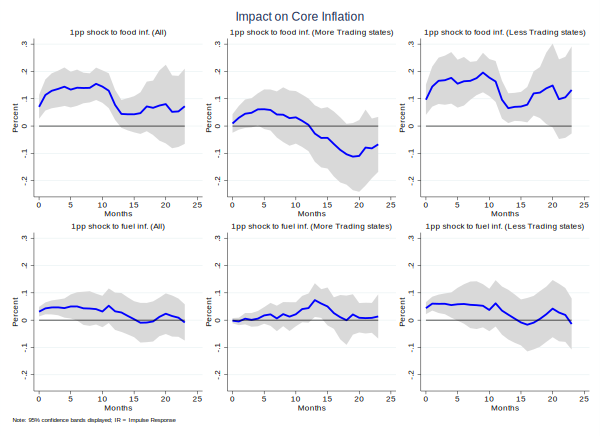

In [12]:
// Combining the impulse response of Core inflation across food/fuel shocks in All India/States dataset in one graph and exporting it
gr combine fig_core_food  fig_core_food_tottrade_m fig_core_food_tottrade_l fig_core_fuel  fig_core_fuel_tottrade_m fig_core_fuel_tottrade_l , ///
col(3) ycommon ///
imargin(tiny) ///
graphregion(color(white)) plotregion(color(white)) ///
iscale(*0.8) ///
title("Impact on Core Inflation", size(small)) ///
note("Note: 95% confidence bands displayed; IR = Impulse Response" ,size(tiny))
/* Save the combined graph to a file */
// graph export "$fd/Results/plots/LP_core_inflation_states_ewaybill_tottradeorting_states.png", width(2600) height(1300)  replace 

#### Results

![](LP_core_inflation_states_ewaybill_tottrade_states.png)

#### 3. Modelling the pass-through across of food and fuel to core inflation based on Export

In [ ]:
// // Specying options for regression
// local ar = 12
// local ma = 12
// local hmax = 24

In [13]:
tab export_ind


       1 if |
    states' |
     export |
   share is |
  more than |
      India |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      3,120       62.50       62.50
          1 |      1,872       37.50      100.00
------------+-----------------------------------
      Total |      4,992      100.00


#### 3.1 Impulse response for states which trade more

states for which export_ind == 1

In [14]:
* Running Core inflation on lags of Food and Fuel Inflation
eststo clear
qui cap drop b_core_food_export_m u_core_food_export_m d_core_food_export_m b_core_fuel_export_m u_core_fuel_export_m d_core_fuel_export_m 

* Initializing variables to store the regression output
// qui gen horizons = _n-1 if _n <= `hmax'
// qui gen Zero = 0 if _n <= `hmax'
qui gen b_core_food_export_m = .
qui gen u_core_food_export_m = .
qui gen d_core_food_export_m = .
qui gen b_core_fuel_export_m = .
qui gen u_core_fuel_export_m = .
qui gen d_core_fuel_export_m = .

forv h = 0/`hmax'{
    
    ** Regression 1
    * on inflation
    qui reghdfe picore_`h' l(0/`ma').pifood l(0/`ma').pifuel l(1/`ar').picore if export_ind == 1, absorb(state2 mdate) cluster(state2)
    
    // Saving the Food Coefficient results
    qui replace b_core_food_export_m = _b[pifood]  if _n == `h'+1
    qui replace u_core_food_export_m = _b[pifood] + 1.96*_se[pifood] if _n == `h'+1
    qui replace d_core_food_export_m = _b[pifood] - 1.96*_se[pifood] if _n == `h'+1
    
    // Saving the Fuel Coefficient Reults
    qui replace b_core_fuel_export_m = _b[pifuel]  if _n == `h'+1
    qui replace u_core_fuel_export_m = _b[pifuel] + 1.96*_se[pifuel] if _n == `h'+1
    qui replace d_core_fuel_export_m = _b[pifuel] - 1.96*_se[pifuel] if _n == `h'+1
    qui eststo
}

// Saving the regression output
// qui esttab using "$fd/Results/regression/lp_core_on_food_fuel_eway_export_more.html", html replace

#### 3.2 Impulse response for states which trade less

states for which export_ind == 0

In [15]:
* Running Core inflation on lags of Food and Fuel Inflation
eststo clear
qui cap drop b_core_food_export_l u_core_food_export_l d_core_food_export_l b_core_fuel_export_l u_core_fuel_export_l d_core_fuel_export_l 

* Initializing variables to store the regression output
// qui gen horizons = _n-1 if _n <= `hmax'
// qui gen Zero = 0 if _n <= `hmax'
qui gen b_core_food_export_l = .
qui gen u_core_food_export_l = .
qui gen d_core_food_export_l = .
qui gen b_core_fuel_export_l = .
qui gen u_core_fuel_export_l = .
qui gen d_core_fuel_export_l = .

forv h = 0/`hmax'{
    
    ** Regression 1
    * on inflation
    qui reghdfe picore_`h' l(0/`ma').pifood l(0/`ma').pifuel l(1/`ar').picore if export_ind == 0, absorb(state2 mdate) cluster(state2)
    
    // Saving the Food Coefficient results
    qui replace b_core_food_export_l = _b[pifood]  if _n == `h'+1
    qui replace u_core_food_export_l = _b[pifood] + 1.96*_se[pifood] if _n == `h'+1
    qui replace d_core_food_export_l = _b[pifood] - 1.96*_se[pifood] if _n == `h'+1
    
    // Saving the Fuel Coefficient Reults
    qui replace b_core_fuel_export_l = _b[pifuel]  if _n == `h'+1
    qui replace u_core_fuel_export_l = _b[pifuel] + 1.96*_se[pifuel] if _n == `h'+1
    qui replace d_core_fuel_export_l = _b[pifuel] - 1.96*_se[pifuel] if _n == `h'+1
    qui eststo
}

// Saving the regression output
// qui esttab using "$fd/Results/regression/lp_core_on_food_fuel_eway_export_less.html", html replace

#### 2.4. Plotting all charts

In [16]:
// Plotting the charts Core on Food inf. Shocks

// 1. All States
qui twoway ///
(rarea u_core_food d_core_food horizons,  ///
fcolor(gs13) lcolor(gs13) lw(none) lpattern(solid)) ///
(line b_core_food horizons, lcolor(blue) ///
lpattern(solid) lwidth(thick)) ///
(line Zero horizons, lcolor(black)), legend(off) ///
title("1pp shock to food inf. (All)", color(black) size(medsmall)) ///
ytitle("Percent", size(medsmall)) xtitle("Months", size(medsmall)) ///
graphregion(color(white)) plotregion(color(white)) 
qui gr rename fig_core_food, replace



// 2. More Exporting states
qui twoway ///
(rarea u_core_food_export_m d_core_food_export_m horizons,  ///
fcolor(gs13) lcolor(gs13) lw(none) lpattern(solid)) ///
(line b_core_food_export_m horizons, lcolor(blue) ///
lpattern(solid) lwidth(thick)) ///
(line Zero horizons, lcolor(black)), legend(off) ///
title("1pp shock to food inf. (More Exporting states)", color(black) size(medsmall)) ///
ytitle("Percent", size(medsmall)) xtitle("Months", size(medsmall)) ///
graphregion(color(white)) plotregion(color(white)) 
qui gr rename fig_core_food_export_m, replace



// 3. Less Exporting states
qui twoway ///
(rarea u_core_food_export_l d_core_food_export_l horizons,  ///
fcolor(gs13) lcolor(gs13) lw(none) lpattern(solid)) ///
(line b_core_food_export_l horizons, lcolor(blue) ///
lpattern(solid) lwidth(thick)) ///
(line Zero horizons, lcolor(black)), legend(off) ///
title("1pp shock to food inf. (Less Exporting states)", color(black) size(medsmall)) ///
ytitle("Percent", size(medsmall)) xtitle("Months", size(medsmall)) ///
graphregion(color(white)) plotregion(color(white)) 
qui gr rename fig_core_food_export_l, replace


// All graphs related to fuel shocks

// 1. All States
qui twoway ///
(rarea u_core_fuel d_core_fuel horizons,  ///
fcolor(gs13) lcolor(gs13) lw(none) lpattern(solid)) ///
(line b_core_fuel horizons, lcolor(blue) ///
lpattern(solid) lwidth(thick)) ///
(line Zero horizons, lcolor(black)), legend(off) ///
title("1pp shock to fuel inf. (All)", color(black) size(medsmall)) ///
ytitle("Percent", size(medsmall)) xtitle("Months", size(medsmall)) ///
graphregion(color(white)) plotregion(color(white)) 
qui gr rename fig_core_fuel, replace


// 2. More Exporting states
qui twoway ///
(rarea u_core_fuel_export_m d_core_fuel_export_m horizons,  ///
fcolor(gs13) lcolor(gs13) lw(none) lpattern(solid)) ///
(line b_core_fuel_export_m horizons, lcolor(blue) ///
lpattern(solid) lwidth(thick)) ///
(line Zero horizons, lcolor(black)), legend(off) ///
title("1pp shock to fuel inf. (More Exporting states)", color(black) size(medsmall)) ///
ytitle("Percent", size(medsmall)) xtitle("Months", size(medsmall)) ///
graphregion(color(white)) plotregion(color(white)) 
qui gr rename fig_core_fuel_export_m, replace


// 3. Less Exporting states
qui twoway ///
(rarea u_core_fuel_export_l d_core_fuel_export_l horizons,  ///
fcolor(gs13) lcolor(gs13) lw(none) lpattern(solid)) ///
(line b_core_fuel_export_l horizons, lcolor(blue) ///
lpattern(solid) lwidth(thick)) ///
(line Zero horizons, lcolor(black)), legend(off) ///
title("1pp shock to fuel inf. (Less Exporting states)", color(black) size(medsmall)) ///
ytitle("Percent", size(medsmall)) xtitle("Months", size(medsmall)) ///
graphregion(color(white)) plotregion(color(white)) 
qui gr rename fig_core_fuel_export_l, replace


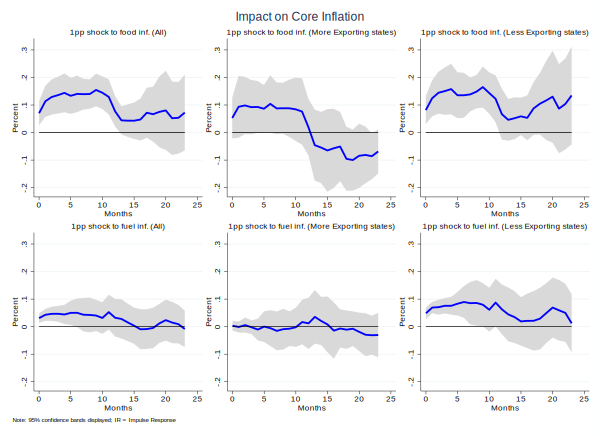

In [18]:
// Combining the impulse response of Core inflation across food/fuel shocks in All India/States dataset in one graph and exporting it
gr combine fig_core_food  fig_core_food_export_m fig_core_food_export_l fig_core_fuel  fig_core_fuel_export_m fig_core_fuel_export_l , ///
col(3) ycommon ///
imargin(tiny) ///
graphregion(color(white)) plotregion(color(white)) ///
iscale(*0.8) ///
title("Impact on Core Inflation", size(small)) ///
note("Note: 95% confidence bands displayed; IR = Impulse Response" ,size(tiny))
/* Save the combined graph to a file */
// graph export "$fd/Results/plots/LP_core_inflation_states_ewaybill_export_states.png", width(2600) height(1300)  replace 

#### Results

![](LP_core_inflation_states_ewaybill_export_states.png)

#### 4. Modelling the pass-through across of food and fuel to core inflation based on Import

In [ ]:
// // Specying options for regression
// local ar = 12
// local ma = 12
// local hmax = 24

In [19]:
tab import_ind


       1 if |
    states' |
     import |
   share is |
  more than |
      India |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      3,276       65.62       65.62
          1 |      1,716       34.38      100.00
------------+-----------------------------------
      Total |      4,992      100.00


#### 4.1 Impulse response for states which trade more

states for which import_ind == 1

In [20]:
* Running Core inflation on lags of Food and Fuel Inflation
eststo clear
qui cap drop b_core_food_import_m u_core_food_import_m d_core_food_import_m b_core_fuel_import_m u_core_fuel_import_m d_core_fuel_import_m 

* Initializing variables to store the regression output
// qui gen horizons = _n-1 if _n <= `hmax'
// qui gen Zero = 0 if _n <= `hmax'
qui gen b_core_food_import_m = .
qui gen u_core_food_import_m = .
qui gen d_core_food_import_m = .
qui gen b_core_fuel_import_m = .
qui gen u_core_fuel_import_m = .
qui gen d_core_fuel_import_m = .

forv h = 0/`hmax'{
    
    ** Regression 1
    * on inflation
    qui reghdfe picore_`h' l(0/`ma').pifood l(0/`ma').pifuel l(1/`ar').picore if import_ind == 1, absorb(state2 mdate) cluster(state2)
    
    // Saving the Food Coefficient results
    qui replace b_core_food_import_m = _b[pifood]  if _n == `h'+1
    qui replace u_core_food_import_m = _b[pifood] + 1.96*_se[pifood] if _n == `h'+1
    qui replace d_core_food_import_m = _b[pifood] - 1.96*_se[pifood] if _n == `h'+1
    
    // Saving the Fuel Coefficient Reults
    qui replace b_core_fuel_import_m = _b[pifuel]  if _n == `h'+1
    qui replace u_core_fuel_import_m = _b[pifuel] + 1.96*_se[pifuel] if _n == `h'+1
    qui replace d_core_fuel_import_m = _b[pifuel] - 1.96*_se[pifuel] if _n == `h'+1
    qui eststo
}

// Saving the regression output
// qui esttab using "$fd/Results/regression/lp_core_on_food_fuel_eway_import_more.html", html replace

#### 4.2 Impulse response for states which trade less

states for which import_ind == 0

In [21]:
* Running Core inflation on lags of Food and Fuel Inflation
eststo clear
qui cap drop b_core_food_import_l u_core_food_import_l d_core_food_import_l b_core_fuel_import_l u_core_fuel_import_l d_core_fuel_import_l 

* Initializing variables to store the regression output
// qui gen horizons = _n-1 if _n <= `hmax'
// qui gen Zero = 0 if _n <= `hmax'
qui gen b_core_food_import_l = .
qui gen u_core_food_import_l = .
qui gen d_core_food_import_l = .
qui gen b_core_fuel_import_l = .
qui gen u_core_fuel_import_l = .
qui gen d_core_fuel_import_l = .

forv h = 0/`hmax'{
    
    ** Regression 1
    * on inflation
    qui reghdfe picore_`h' l(0/`ma').pifood l(0/`ma').pifuel l(1/`ar').picore if import_ind == 0, absorb(state2 mdate) cluster(state2)
    
    // Saving the Food Coefficient results
    qui replace b_core_food_import_l = _b[pifood]  if _n == `h'+1
    qui replace u_core_food_import_l = _b[pifood] + 1.96*_se[pifood] if _n == `h'+1
    qui replace d_core_food_import_l = _b[pifood] - 1.96*_se[pifood] if _n == `h'+1
    
    // Saving the Fuel Coefficient Reults
    qui replace b_core_fuel_import_l = _b[pifuel]  if _n == `h'+1
    qui replace u_core_fuel_import_l = _b[pifuel] + 1.96*_se[pifuel] if _n == `h'+1
    qui replace d_core_fuel_import_l = _b[pifuel] - 1.96*_se[pifuel] if _n == `h'+1
    qui eststo
}

// Saving the regression output
// qui esttab using "$fd/Results/regression/lp_core_on_food_fuel_eway_import_less.html", html replace

#### 2.4. Plotting all charts

In [22]:
// Plotting the charts Core on Food inf. Shocks

// 1. All States
qui twoway ///
(rarea u_core_food d_core_food horizons,  ///
fcolor(gs13) lcolor(gs13) lw(none) lpattern(solid)) ///
(line b_core_food horizons, lcolor(blue) ///
lpattern(solid) lwidth(thick)) ///
(line Zero horizons, lcolor(black)), legend(off) ///
title("1pp shock to food inf. (All)", color(black) size(medsmall)) ///
ytitle("Percent", size(medsmall)) xtitle("Months", size(medsmall)) ///
graphregion(color(white)) plotregion(color(white)) 
qui gr rename fig_core_food, replace



// 2. More importing states
qui twoway ///
(rarea u_core_food_import_m d_core_food_import_m horizons,  ///
fcolor(gs13) lcolor(gs13) lw(none) lpattern(solid)) ///
(line b_core_food_import_m horizons, lcolor(blue) ///
lpattern(solid) lwidth(thick)) ///
(line Zero horizons, lcolor(black)), legend(off) ///
title("1pp shock to food inf. (More importing states)", color(black) size(medsmall)) ///
ytitle("Percent", size(medsmall)) xtitle("Months", size(medsmall)) ///
graphregion(color(white)) plotregion(color(white)) 
qui gr rename fig_core_food_import_m, replace



// 3. Less importing states
qui twoway ///
(rarea u_core_food_import_l d_core_food_import_l horizons,  ///
fcolor(gs13) lcolor(gs13) lw(none) lpattern(solid)) ///
(line b_core_food_import_l horizons, lcolor(blue) ///
lpattern(solid) lwidth(thick)) ///
(line Zero horizons, lcolor(black)), legend(off) ///
title("1pp shock to food inf. (Less importing states)", color(black) size(medsmall)) ///
ytitle("Percent", size(medsmall)) xtitle("Months", size(medsmall)) ///
graphregion(color(white)) plotregion(color(white)) 
qui gr rename fig_core_food_import_l, replace


// All graphs related to fuel shocks

// 1. All States
qui twoway ///
(rarea u_core_fuel d_core_fuel horizons,  ///
fcolor(gs13) lcolor(gs13) lw(none) lpattern(solid)) ///
(line b_core_fuel horizons, lcolor(blue) ///
lpattern(solid) lwidth(thick)) ///
(line Zero horizons, lcolor(black)), legend(off) ///
title("1pp shock to fuel inf. (All)", color(black) size(medsmall)) ///
ytitle("Percent", size(medsmall)) xtitle("Months", size(medsmall)) ///
graphregion(color(white)) plotregion(color(white)) 
qui gr rename fig_core_fuel, replace


// 2. More importing states
qui twoway ///
(rarea u_core_fuel_import_m d_core_fuel_import_m horizons,  ///
fcolor(gs13) lcolor(gs13) lw(none) lpattern(solid)) ///
(line b_core_fuel_import_m horizons, lcolor(blue) ///
lpattern(solid) lwidth(thick)) ///
(line Zero horizons, lcolor(black)), legend(off) ///
title("1pp shock to fuel inf. (More importing states)", color(black) size(medsmall)) ///
ytitle("Percent", size(medsmall)) xtitle("Months", size(medsmall)) ///
graphregion(color(white)) plotregion(color(white)) 
qui gr rename fig_core_fuel_import_m, replace


// 3. Less importing states
qui twoway ///
(rarea u_core_fuel_import_l d_core_fuel_import_l horizons,  ///
fcolor(gs13) lcolor(gs13) lw(none) lpattern(solid)) ///
(line b_core_fuel_import_l horizons, lcolor(blue) ///
lpattern(solid) lwidth(thick)) ///
(line Zero horizons, lcolor(black)), legend(off) ///
title("1pp shock to fuel inf. (Less importing states)", color(black) size(medsmall)) ///
ytitle("Percent", size(medsmall)) xtitle("Months", size(medsmall)) ///
graphregion(color(white)) plotregion(color(white)) 
qui gr rename fig_core_fuel_import_l, replace

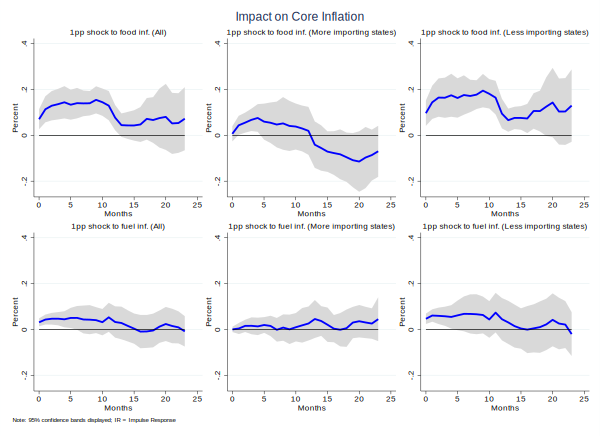




(file /Users/suraj/Dropbox/NKPC Estimation State Panel data//Results/plots/LP_co
> re_inflation_states_ewaybill_import_states.png written in PNG format)


In [23]:
// Combining the impulse response of Core inflation across food/fuel shocks in All India/States dataset in one graph and importing it
gr combine fig_core_food  fig_core_food_import_m fig_core_food_import_l fig_core_fuel  fig_core_fuel_import_m fig_core_fuel_import_l , ///
col(3) ycommon ///
imargin(tiny) ///
graphregion(color(white)) plotregion(color(white)) ///
iscale(*0.8) ///
title("Impact on Core Inflation", size(small)) ///
note("Note: 95% confidence bands displayed; IR = Impulse Response" ,size(tiny))
/* Save the combined graph to a file */
graph export "$fd/Results/plots/LP_core_inflation_states_ewaybill_import_states.png", width(2600) height(1300)  replace 

#### Results

![](LP_core_inflation_states_ewaybill_import_states.png)